# Oranges vs Grapefruit Classification
Link Dataset : https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit
## Decision Tree Classification

### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Load Data

In [3]:
# Load dataset
df = pd.read_csv('oranges_vs_grapefruit.csv')

# Tampilkan 5 data pertama
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


### EDA (Exploratory Data Analysis)

In [24]:
# Cek jumlah baris dan kolom
df.shape

(10000, 6)

In [4]:
# Tampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
# Stats deskriptif
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
# Cek missing values
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [9]:
# Cek duplikat
print('Jumlah data duplikat: ', df.duplicated().sum())

Jumlah data duplikat:  0


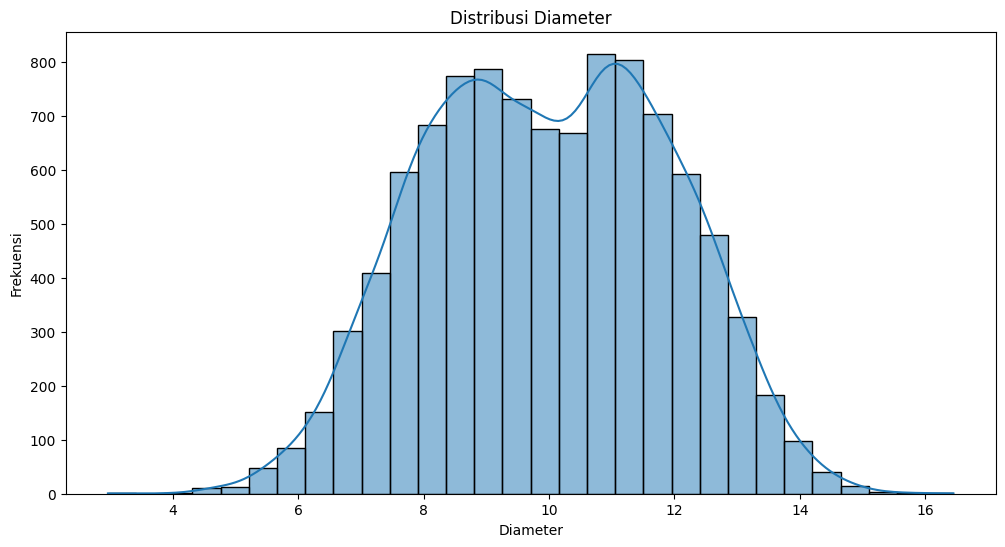

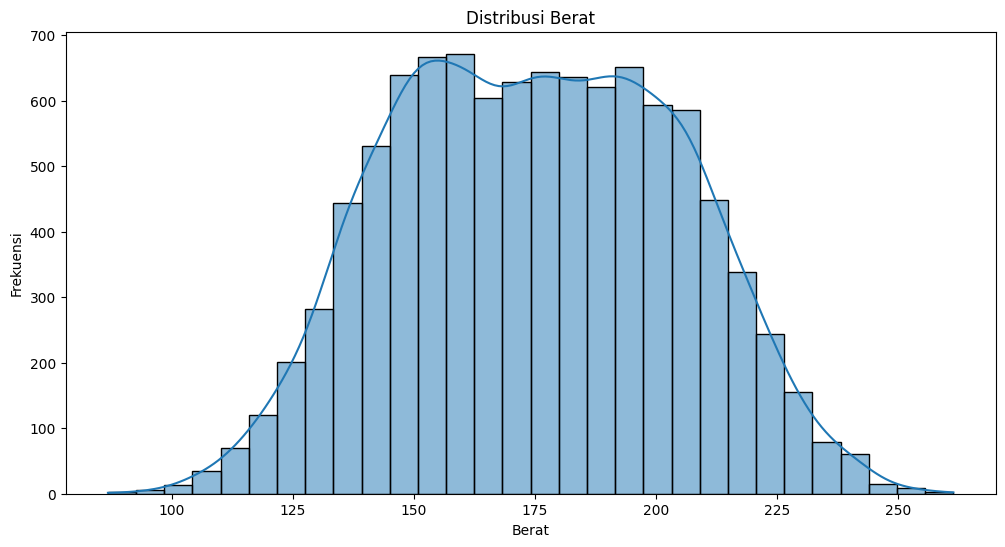

In [11]:
# Visualisasi distribusi data per fitur
plt.figure(figsize=(12, 6))
sns.histplot(df['diameter'], kde=True, bins=30)
plt.title('Distribusi Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['weight'], kde=True, bins=30)
plt.title('Distribusi Berat')
plt.xlabel('Berat')
plt.ylabel('Frekuensi')
plt.show()


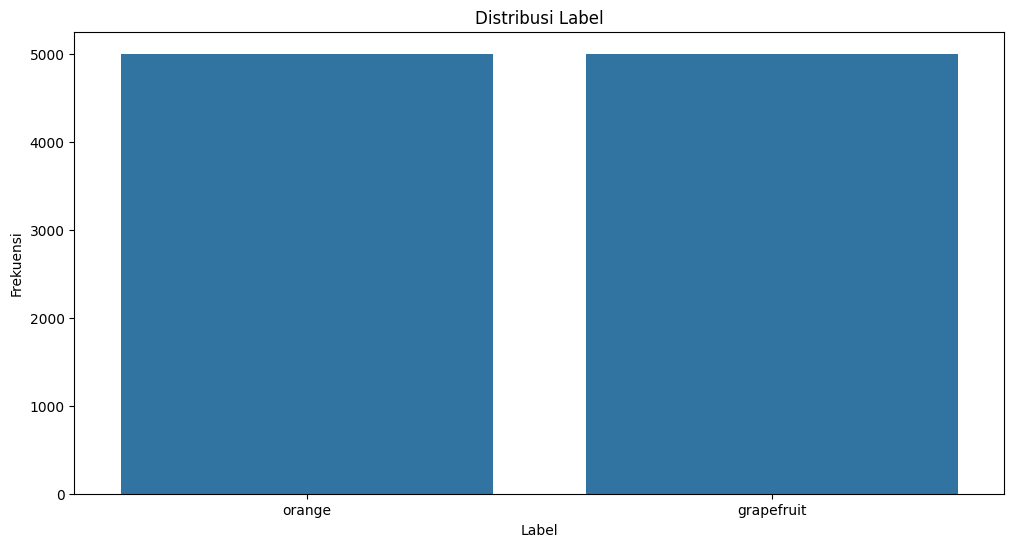

In [13]:
# Visualisaiasi distribusi data per label
plt.figure(figsize=(12, 6))
sns.countplot(x='name', data=df)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

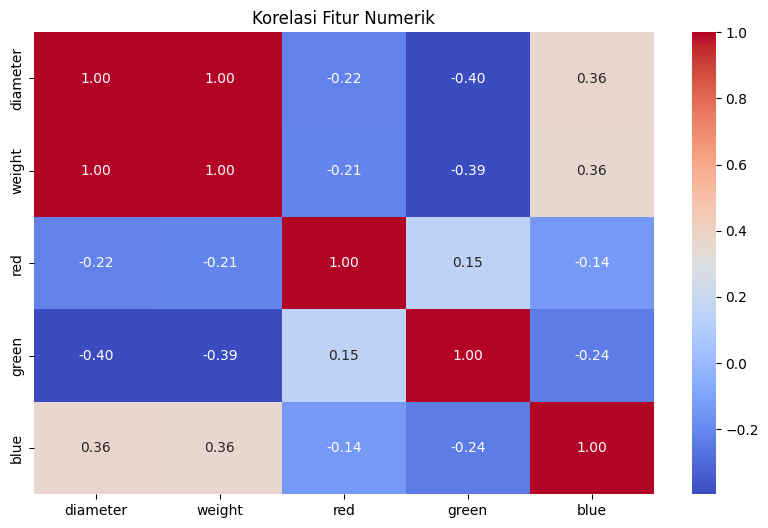

In [19]:
# Drop kolom non-numerik (label)
numeric_df = df.drop('name', axis=1)

# Korelasi fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Fitur Numerik')
plt.show()

### Data Preprocessing

In [27]:
# Pisahkan fitur dan label
X = df.drop('name', axis=1)
y = df['name']

# Encode label
y = y.map({'orange': 0, 'grapefruit': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek hasil scaling
print('Data sebelum scaling:\n', X_train.head())

print('\nData setelah scaling:\n', X_train_scaled[:5])

Data sebelum scaling:
       diameter  weight  red  green  blue
9254     12.77  217.28  153     75    23
1561      7.87  143.57  159     86    19
1670      7.95  144.74  173     82     2
6087     10.53  182.24  158     74    14
6669     10.94  189.20  142     94     2

Data setelah scaling:
 [[ 1.43187986  1.44206883 -0.07850112 -0.08196241  1.29250599]
 [-1.08634927 -1.08200811  0.49818296  0.85927368  0.84930252]
 [-1.04523533 -1.0419434   1.84377914  0.51700601 -1.03431227]
 [ 0.2806894   0.24218203  0.40206894 -0.16752933  0.29529817]
 [ 0.49139837  0.48051571 -1.13575526  1.54380903 -1.03431227]]


### Model Training

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1012
           1       0.94      0.95      0.94       988

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



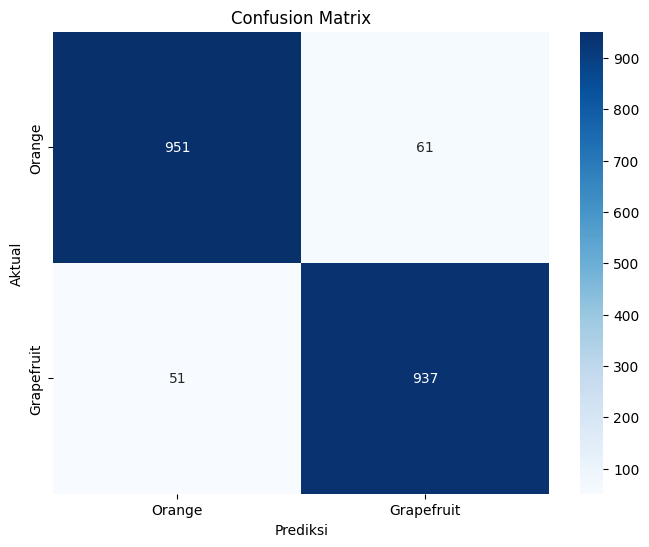

In [28]:
# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = dt_model.predict(X_test_scaled)

# Evaluasi model
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Orange', 'Grapefruit'], yticklabels=['Orange', 'Grapefruit'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Hyperparameter Tuning

In [29]:
# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_dt.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_dt.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


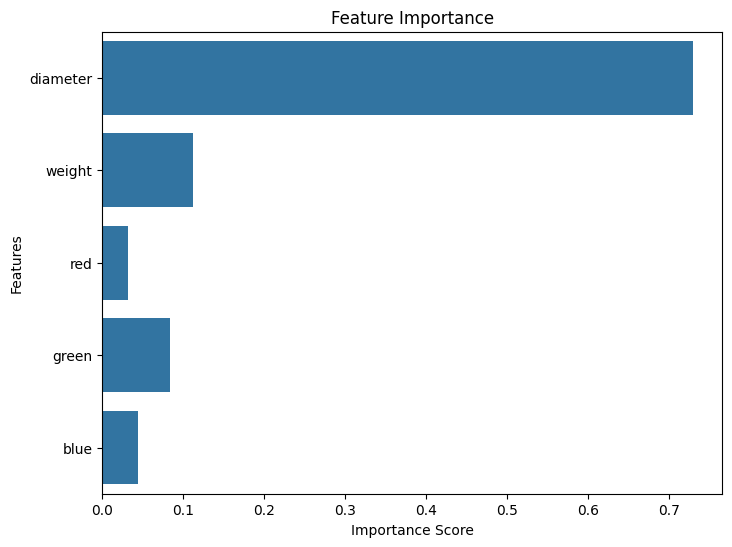

In [30]:
# Cek fitur importance
importances = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


### Model Training after Hyperparameter Tuning

In [31]:
# Inisialisasi ulang model dengan best parameters
best_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Latih model dengan data training
best_dt_model.fit(X_train_scaled, y_train)

# Prediksi dengan data testing
y_pred_best = best_dt_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1012
           1       0.94      0.95      0.95       988

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



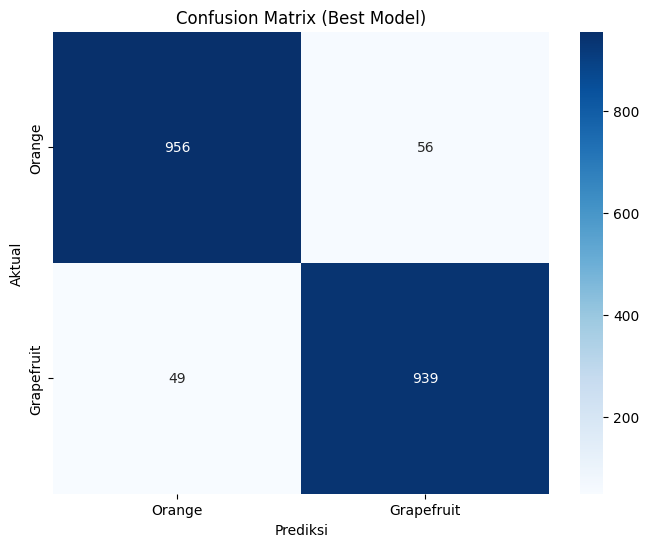

In [32]:
# Evaluasi model
print(classification_report(y_test, y_pred_best))
cm_best = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Orange', 'Grapefruit'], yticklabels=['Orange', 'Grapefruit'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

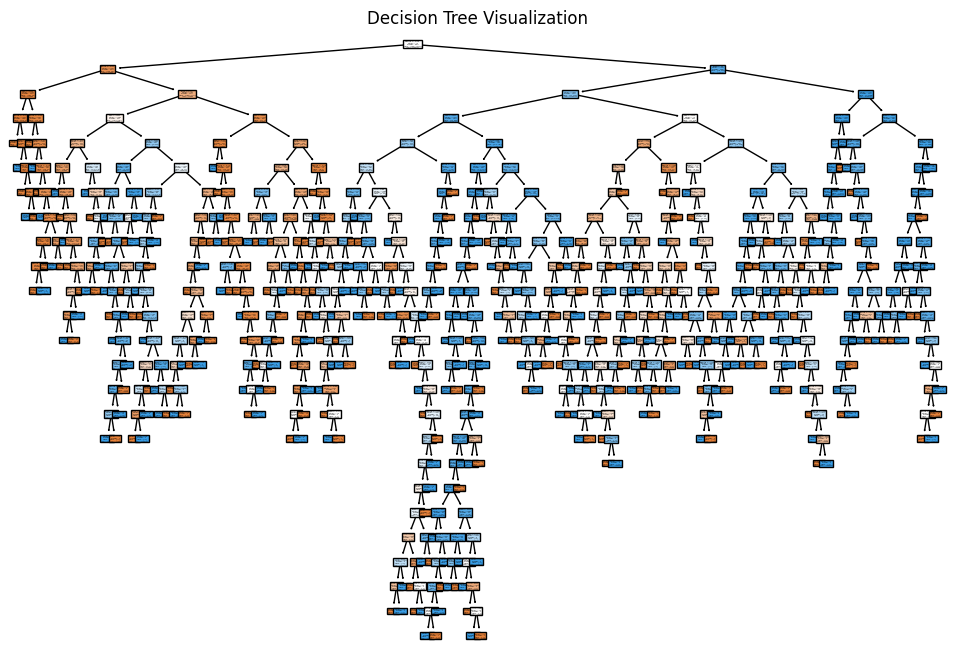

In [33]:
# Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Orange', 'Grapefruit'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

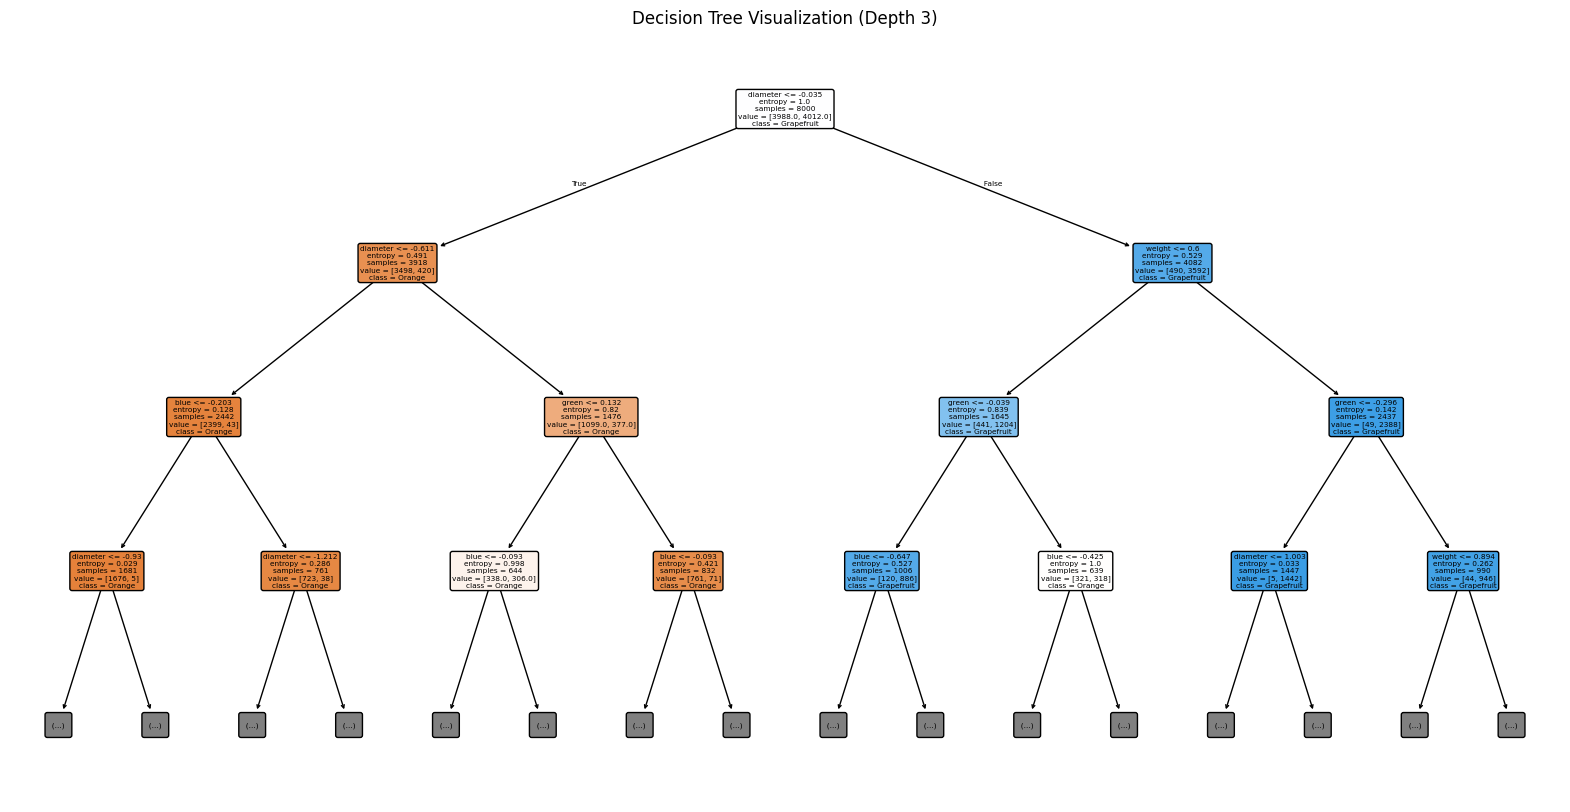

In [35]:
# Visualisasi decision tree (max_depth dibatasi agar mudah dibaca)
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=['Orange', 'Grapefruit'],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Decision Tree Visualization (Depth 3)")
plt.show()

## 📌 Conclusion

- The Decision Tree model achieved a high classification accuracy of approximately **95%** for distinguishing between **oranges** and **grapefruits**, even before hyperparameter tuning.
- After applying **GridSearchCV** for tuning, there was no significant improvement in performance, indicating that the initial model was already well-optimized.
- The **diameter** feature played the most significant role in the classification process, followed by the weight.
- One of the main strengths of Decision Trees is their **interpretability**, as shown by the easy-to-read tree visualization.
- In summary, the Decision Tree algorithm is a reliable and efficient choice for simple classification tasks involving numerical features like in this dataset.